# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [21]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
from panel import widgets
import numpy as np



pn.extension()

In [22]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

# Import Data

In [23]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [35]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    mean_housing = sfo_data['housing_units'].groupby('year').mean()
    mean_housing_std = mean_housing.std()
    mean_housing_max = mean_housing.max()
    mean_housing_min = mean_housing.min()
    return mean_housing.plot.bar(x='Year', y='Housing Units', ylim=[mean_housing_min, (mean_housing_max+2000)], title='Housing Units SF 2010-2016')


def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    gross_rent = sfo_data[['sale_price_sqr_foot', 'gross_rent']].groupby('year').mean()
    return gross_rent.hvplot.line(y='gross_rent', ylabel = 'Gross Rent', title = ('AVERAGE GROSS RENT PER YEAR'))


def average_sales_price():
    """Average Sales Price Per Year."""
    gross_rent = sfo_data[['sale_price_sqr_foot', 'gross_rent']].groupby('year').mean()
    return gross_rent.hvplot.line(y='sale_price_sqr_foot', ylabel ='AVG Sale Price', title = ('AVERAGE SALE PRICE PER SQ FT. PER YEAR'))

## Come back to this one 

def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    nbrhood_data = sfo_data[['neighborhood', 'sale_price_sqr_foot', 'housing_units', 'gross_rent']].reset_index()
    neighborhood_choices = nbrhood_data.neighborhood.unique()
    def nbrhood_plot(neighborhood_input):
        output_nbrhood = nbrhood_data.loc[nbrhood_data['neighborhood']== neighborhood_input].sort_values('year')

        return output_nbrhood.hvplot.line(
            x="year",
            y="sale_price_sqr_foot",
            xlabel = 'Year',
            ylabel ='AVG Sale Price per Sq. Foot',
            title=f"Neighborhood: {neighborhood_input}",
        )

    return interact(nbrhood_plot, neighborhood_input=neighborhood_choices)


def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    nbrhood_data = sfo_data[['neighborhood', 'sale_price_sqr_foot', 'housing_units', 'gross_rent']].reset_index()
    neighborhood_values = pd.pivot_table(data = nbrhood_data, index = ['neighborhood'], aggfunc = {'sale_price_sqr_foot':np.mean, 'housing_units':np.mean, 'gross_rent':np.mean})
    most_expensive = neighborhood_values.sort_values('sale_price_sqr_foot', ascending=False).head(10).reset_index()
    return most_expensive.hvplot.bar(
        x="neighborhood",
        y='sale_price_sqr_foot', 
        rot=90
        ).opts(xlabel='Neighborhood', ylabel='AVG Price per Sq. Foot', title = 'Top 10 Expensive Neighborhoods in SFO', width=900, height=400)

def parallel_coordinates():
    """Parallel Coordinates Plot."""
    nbrhood_data = sfo_data[['neighborhood', 'sale_price_sqr_foot', 'housing_units', 'gross_rent']].reset_index()
    neighborhood_values = pd.pivot_table(data = nbrhood_data, index = ['neighborhood'], aggfunc = {'sale_price_sqr_foot':np.mean, 'housing_units':np.mean, 'gross_rent':np.mean})
    most_expensive = neighborhood_values.sort_values('sale_price_sqr_foot', ascending=False).head(10).reset_index()
    return px.parallel_coordinates(most_expensive, color='sale_price_sqr_foot')


def parallel_categories():
    """Parallel Categories Plot."""
    nbrhood_data = sfo_data[['neighborhood', 'sale_price_sqr_foot', 'housing_units', 'gross_rent']].reset_index()
    neighborhood_values = pd.pivot_table(data = nbrhood_data, index = ['neighborhood'], aggfunc = {'sale_price_sqr_foot':np.mean, 'housing_units':np.mean, 'gross_rent':np.mean})
    most_expensive = neighborhood_values.sort_values('sale_price_sqr_foot', ascending=False).head(10).reset_index()
    return px.parallel_categories(
    most_expensive,
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "neighborhood": "Neighborhood",
        "sale_price_sqr_foot": "Sale Price per Sq. Foot",
        "housing_units": "Housing Units",
        "gross_rent": "Gross Rent",
    },
)


def neighborhood_map():
    """Neighborhood Map"""
    
    # YOUR CODE HERE!



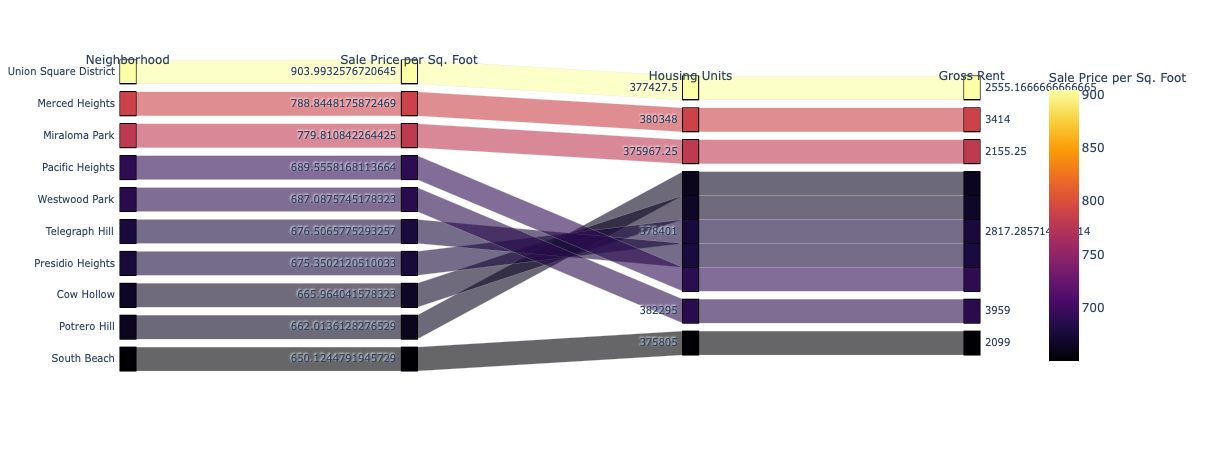

In [36]:
parallel_categories()

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

## Serve the Panel Dashboard

Column(width=900)
    [0] Row
        [0] Markdown(str, width=800)
    [1] Tabs
        [0] Column
            [0] Markdown(str)
            [1] Plotly(ExpressFigure)
        [1] Row
            [0] Matplotlib(Figure, tight=True)
            [1] Matplotlib(Figure, tight=True)
            [2] Matplotlib(Figure, tight=True)
        [2] Column
            [0] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
            [1] HoloViews(Bars)
        [3] Column(width=960)
            [0] Plotly(ExpressFigure)
            [1] Plotly(ExpressFigure)
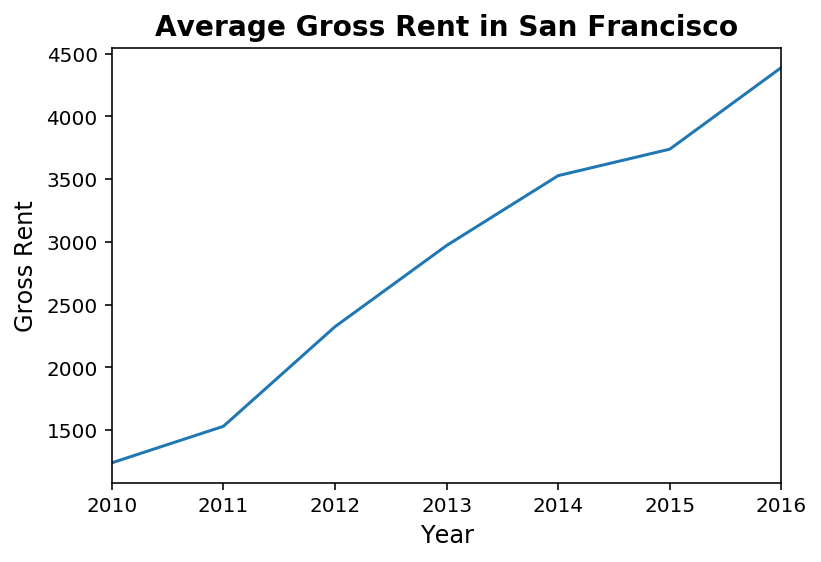
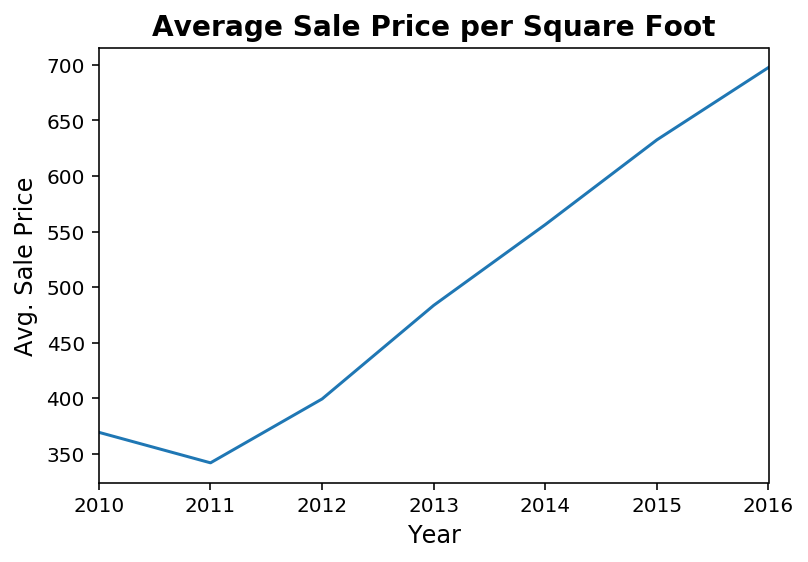
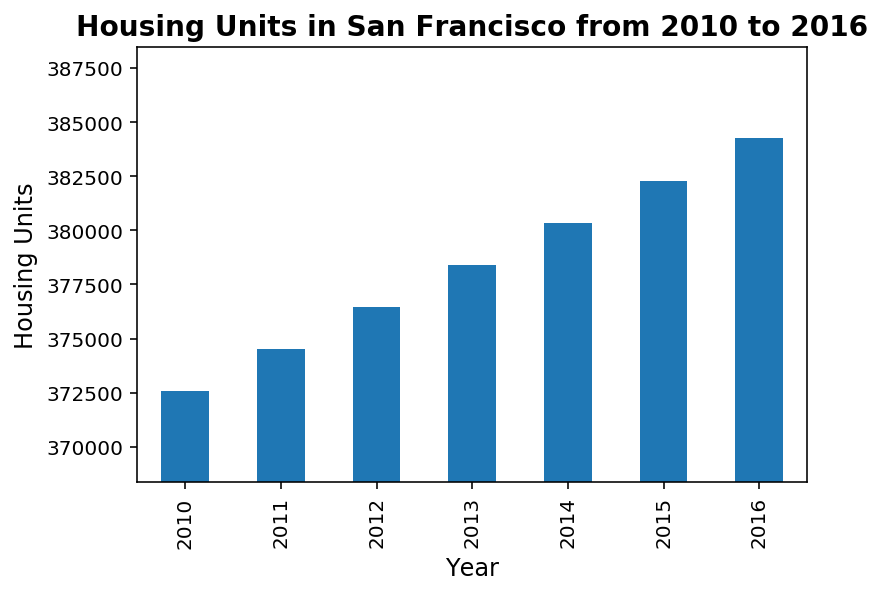

In [6]:
panel.servable()